In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import os 
import matplotlib.pyplot as plt 
from collections import Counter
import networkx as nx
import pandas as pd
import numpy as np
import ast
from collections import Counter
from shutil import copyfile
import re

%matplotlib inline

In [15]:
lines = ['\t'.join([' ', 'MUTAG', 'IMDB-B', 'IMDB-M', 'COX2', 'AIDS', 'PROTEINS'])]
for algo in ['WL', 'V']:
    new_lines = [[algo], [algo+'-PH'], [algo+'-P']]
    for data in ['MUTAG', 'IMDB-BINARY', 'IMDB-MULTI', 'COX2', 'AIDS', 'PROTEINS']:
        with open(f'kernel_results_fixed/{data}/{algo}/results.txt') as f:
            for i, line in enumerate(f):
                splitted = line.split()
                acc = splitted[5]
                acc_iso = splitted[7]
                new_lines[i] += ["{} ({})".format(acc, acc_iso)]
                if i == 2:
                    break
    for line in new_lines:
        print('*'.join(line))
        lines.append('*'.join(line))

WL*0.862 (0.867)*0.734 (0.990)*0.502 (0.953)*0.800 (0.974)*0.993 (0.999)*0.747 (0.950)
WL-PH*0.907 (1.000)*0.736 (1.000)*0.504 (1.000)*0.810 (1.000)*0.994 (1.000)*0.749 (1.000)
WL-P*0.870 (0.838)*0.724 (0.715)*0.495 (0.487)*0.794 (0.844)*0.994 (0.999)*0.740 (0.742)
V*0.836 (0.902)*0.707 (0.820)*0.503 (0.732)*0.781 (0.966)*0.994 (0.997)*0.726 (0.946)
V-PH*0.859 (1.000)*0.750 (1.000)*0.517 (1.000)*0.794 (1.000)*0.996 (1.000)*0.729 (1.000)
V-P*0.827 (0.844)*0.724 (0.728)*0.496 (0.481)*0.768 (0.852)*0.996 (0.999)*0.719 (0.741)


In [14]:
lines

[' \tMUTAG\tIMDB-B\tIMDB-M\tCOX2\tAIDS\tPROTEINS',
 'WL*0.862 (0.867)*0.734 (0.990)*0.502 (0.953)*0.800 (0.974)*0.993 (0.999)*0.747 (0.950)',
 'WL-PH*0.907 (1.000)*0.736 (1.000)*0.504 (1.000)*0.810 (1.000)*0.994 (1.000)*0.749 (1.000)',
 'WL-P*0.870 (0.838)*0.724 (0.715)*0.495 (0.487)*0.794 (0.844)*0.994 (0.999)*0.740 (0.742)',
 'V*0.836 (0.902)*0.707 (0.820)*0.503 (0.732)*0.781 (0.966)*0.994 (0.997)*0.726 (0.946)',
 'V-PH*0.859 (1.000)*0.750 (1.000)*0.517 (1.000)*0.794 (1.000)*0.996 (1.000)*0.729 (1.000)',
 'V-P*0.827 (0.844)*0.724 (0.728)*0.496 (0.481)*0.768 (0.852)*0.996 (0.999)*0.719 (0.741)']

In [105]:
def get_orbits(fn):
    orbits = []
    with open(fn) as f:
        for line in f:
            orbits.append(int(line.split()[1]))
    return orbits

In [4]:
dir = 'results2/orbits/'
fns = list(filter(lambda x: x.endswith('.txt'), os.listdir(dir)))

In [9]:
sizes = []
for fn in fns:
    sizes.append(get_orbits(dir + fn))

In [12]:
filtered = list(filter(lambda x: len(x), sizes))

FIRSTMM_DB_orbits.txt
OHSU_orbits.txt
KKI_orbits.txt
Peking_1_orbits.txt
MUTAG_orbits.txt
MSRC_21C_orbits.txt
MSRC_9_orbits.txt
Cuneiform_orbits.txt
SYNTHETIC_orbits.txt
COX2_MD_orbits.txt
BZR_MD_orbits.txt
PTC_MM_orbits.txt
PTC_MR_orbits.txt
PTC_FM_orbits.txt
PTC_FR_orbits.txt
DHFR_MD_orbits.txt
Synthie_orbits.txt
BZR_orbits.txt
ER_MD_orbits.txt
COX2_orbits.txt
MSRC_21_orbits.txt
ENZYMES_orbits.txt
DHFR_orbits.txt
IMDB-BINARY_orbits.txt
PROTEINS_orbits.txt
DD_orbits.txt
IMDB-MULTI_orbits.txt
AIDS_orbits.txt
REDDIT-BINARY_orbits.txt
Letter-high_orbits.txt
Letter-low_orbits.txt
Letter-med_orbits.txt
Fingerprint_orbits.txt
COIL-DEL_orbits.txt
COIL-RAG_orbits.txt
NCI1_orbits.txt
NCI109_orbits.txt
FRANKENSTEIN_orbits.txt
Mutagenicity_orbits.txt
REDDIT-MULTI-5K_orbits.txt
COLLAB_orbits.txt
Tox21_ARE_orbits.txt
Tox21_aromatase_orbits.txt
Tox21_MMP_orbits.txt
Tox21_ER_orbits.txt
Tox21_HSE_orbits.txt
Tox21_AHR_orbits.txt
Tox21_PPAR-gamma_orbits.txt
Tox21_AR-LBD_orbits.txt
Tox21_p53_orbits.txt


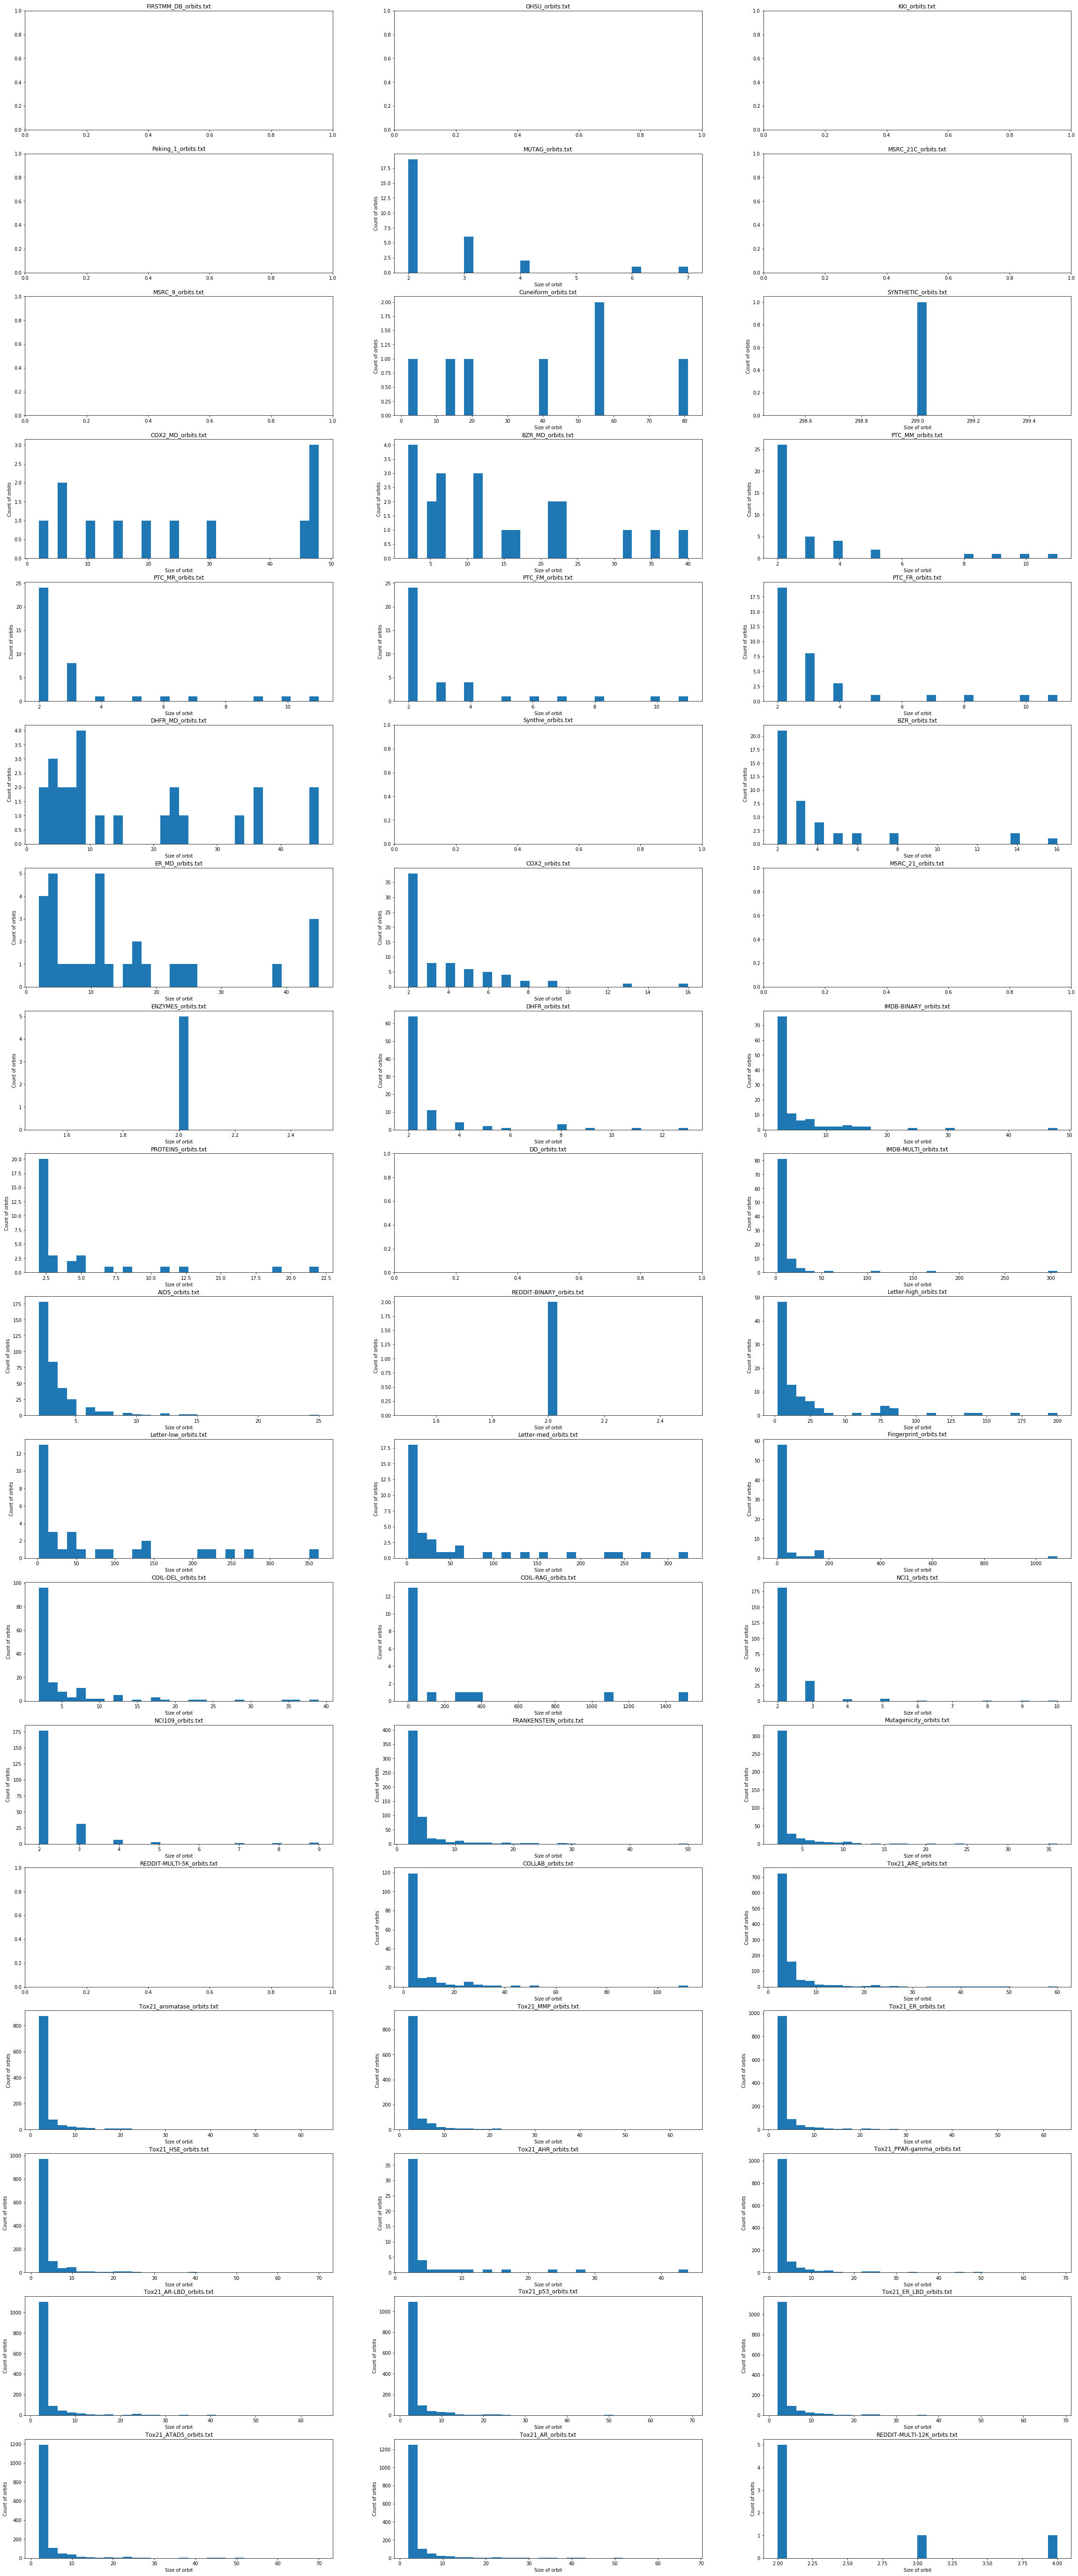

In [72]:
N = len(fns)
fig, axes = plt.subplots(nrows=N//3, ncols=3, figsize=(40, 100))

for i, fn in enumerate(fns):    
    orbits = get_orbits(dir + fn)
    c = Counter(orbits)
    ax = axes[i//3][i%3]
    ax.set_title(fn)
    print(fn)
    if len(orbits):
        ax.hist(orbits, bins=30)
        ax.set_xlabel('Size of orbit')
        ax.set_ylabel('Count of orbits')
        ymax = c.most_common(1)[0][1]

print(i)
plt.savefig('orbits.png', bbox_inches='tight')
plt.show()

In [106]:
orbits1, orbits2 = get_orbits(dir2 + 'orbits/MUTAG_orbits.txt'),  get_orbits(dir1 + 'orbits/MUTAG_orbits.txt')

In [110]:
os.listdir('datasets/data_adj/MUTAG_adj/')

['graph_1.adj',
 '1.node_labels',
 '1.edge_labels',
 'graph_2.adj',
 '2.node_labels',
 '2.edge_labels',
 'graph_3.adj',
 '3.node_labels',
 '3.edge_labels',
 'graph_4.adj',
 '4.node_labels',
 '4.edge_labels',
 'graph_5.adj',
 '5.node_labels',
 '5.edge_labels',
 'graph_6.adj',
 '6.node_labels',
 '6.edge_labels',
 'graph_7.adj',
 '7.node_labels',
 '7.edge_labels',
 'graph_8.adj',
 '8.node_labels',
 '8.edge_labels',
 'graph_9.adj',
 '9.node_labels',
 '9.edge_labels',
 'graph_10.adj',
 '10.node_labels',
 '10.edge_labels',
 'graph_11.adj',
 '11.node_labels',
 '11.edge_labels',
 'graph_12.adj',
 '12.node_labels',
 '12.edge_labels',
 'graph_13.adj',
 '13.node_labels',
 '13.edge_labels',
 'graph_14.adj',
 '14.node_labels',
 '14.edge_labels',
 'graph_15.adj',
 '15.node_labels',
 '15.edge_labels',
 'graph_16.adj',
 '16.node_labels',
 '16.edge_labels',
 'graph_17.adj',
 '17.node_labels',
 '17.edge_labels',
 'graph_18.adj',
 '18.node_labels',
 '18.edge_labels',
 'graph_19.adj',
 '19.node_labels',
 

In [107]:
def num_pairs(orbits):
    cum = 0
    for n in orbits:
        cum += n*(n-1)/2
    return cum

In [122]:
187*186/2

17391.0

In [119]:
orbits2, num_pairs(orbits2)

([4, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], 25.0)

In [127]:
f"{.2345:.2f}"

'0.23'

In [146]:
 get_orbits(dir1 + f'orbits/Cuneiform_orbits.txt')

[81, 55, 55, 40, 18, 15, 2]

In [9]:
import torch

In [10]:
g_list, n = load_data('IMDBBINARY', False)

loading data
# classes: 2
# maximum node tag: 1
# data: 1000


In [141]:
da

NameError: name 'da' is not defined

In [150]:
with open('nauty_results/clean_stats_no_labels.txt') as f:
    for line in f:
        print(ast.literal_eval(line))

{'name': 'FIRSTMM_DB', 'size': 41, 'old_size': 41, 'avg_nodes': 1377.2682926829268, 'avg_edges': 6147.512195121952, 'classes': {10: 4, 6: 3, 1: 5, 9: 3, 3: 6, 5: 5, 8: 5, 0: 3, 2: 3, 7: 2, 4: 2}}
{'name': 'OHSU', 'size': 79, 'old_size': 79, 'avg_nodes': 82.0126582278481, 'avg_edges': 399.3164556962025, 'classes': {1: 44, 0: 35}}
{'name': 'KKI', 'size': 83, 'old_size': 83, 'avg_nodes': 26.96385542168675, 'avg_edges': 96.8433734939759, 'classes': {0: 37, 1: 46}}
{'name': 'Peking_1', 'size': 85, 'old_size': 85, 'avg_nodes': 39.305882352941175, 'avg_edges': 154.7058823529412, 'classes': {1: 36, 0: 49}}
{'name': 'MUTAG', 'size': 137, 'old_size': 188, 'avg_nodes': 18.81021897810219, 'avg_edges': 41.59124087591241, 'classes': {1: 94, 0: 43}}
{'name': 'MSRC_21C', 'size': 209, 'old_size': 209, 'avg_nodes': 40.27751196172249, 'avg_edges': 193.20574162679426, 'classes': {5: 12, 3: 29, 6: 22, 7: 18, 1: 25, 14: 6, 13: 25, 16: 10, 8: 3, 12: 6, 2: 21, 0: 3, 15: 17, 4: 9, 10: 1, 9: 1, 11: 1}}
{'name':

In [151]:
print('Dataset size retention nodes edges num_classes min_class max_class')
with open('nauty_results/clean_stats_no_labels.txt') as f:
    for line in f:
        parsed = ast.literal_eval(line)
        classes = list(parsed['classes'].values())
        name = parsed['name'] 
        size = parsed['size']
        old_size = parsed['old_size']
        avg_nodes = parsed['avg_nodes']
        avg_edges = parsed['avg_edges']
        print('{} {} {:.2f} {:.2f} {:.2f} {} {} {}'.format(name, size, size/old_size*100, avg_nodes, avg_edges, len(classes), np.min(classes), np.max(classes)))

Dataset size retention nodes edges num_classes min_class max_class
FIRSTMM_DB 41 100.00 1377.27 6147.51 11 2 6
OHSU 79 100.00 82.01 399.32 2 35 44
KKI 83 100.00 26.96 96.84 2 37 46
Peking_1 85 100.00 39.31 154.71 2 36 49
MUTAG 137 72.87 18.81 41.59 2 43 94
MSRC_21C 209 100.00 40.28 193.21 17 1 29
MSRC_9 221 100.00 40.58 195.87 8 19 30
Cuneiform 1 0.37 36.00 180.00 1 1 1
SYNTHETIC 1 0.33 100.00 392.00 1 1 1
COX2_MD 4 1.32 28.50 827.00 2 1 3
BZR_MD 7 2.29 15.57 302.00 2 1 6
PTC_MM 227 67.56 16.98 35.36 2 77 150
PTC_MR 236 68.60 17.17 35.82 2 96 140
PTC_FM 243 69.63 16.91 35.19 2 85 158
PTC_FR 254 72.36 17.06 35.60 2 86 168
DHFR_MD 5 1.27 24.40 670.00 2 1 4
Synthie 400 100.00 95.00 345.86 4 90 110
BZR 277 68.40 36.23 77.59 2 72 205
ER_MD 15 3.36 18.00 442.53 2 1 14
COX2 237 50.75 42.14 88.85 2 68 169
MSRC_21 563 100.00 77.52 396.65 20 10 34
ENZYMES 595 99.17 32.66 124.34 6 98 100
DHFR 578 76.46 43.37 91.07 2 205 373
IMDB-BINARY 493 49.30 24.08 221.96 2 232 261
PROTEINS 975 87.60 43.41 162

Text(0, 0.5, 'Acc')

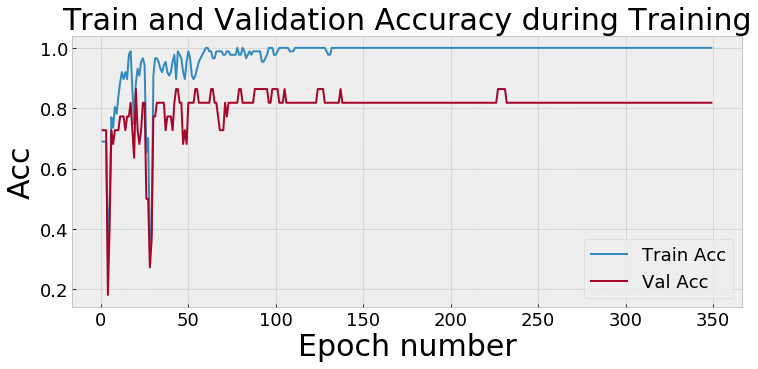

In [95]:
plt.style.use('bmh')
# plt.rcParams['font.family'] = 'serif'
# plt.rcParams['font.serif'] = 'Ubuntu'
# plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 30
plt.rcParams['axes.labelsize'] = 30
# plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 30
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['figure.titlesize'] = 22
train_accs = []
val_accs = []

with open('gnn_results/epochs_MUTAG.txt') as f:
    for line in f:
        train_acc = ast.literal_eval(line)
        val_acc = ast.literal_eval(next(f))
        train_accs.append(train_acc)
        val_accs.append(val_acc)
        
# df = pd.DataFrame({'x1': train_accs[0], 'x2': val_accs[0]})
# df=  df.reset_index()
# df['index'] += 1
# df.plot(x='index', y=['x1', 'x2'])

y1 = train_accs[0]
y2 = val_accs[0]
x = range(1, len(y1)+1)

plt.figure(figsize=(12,5))

plt.plot(x, y1)
plt.plot(x, y2)
plt.legend(['Train Acc', 'Val Acc'])
plt.title("Train and Validation Accuracy during Training")
plt.xlabel('Epoch number')
plt.ylabel('Acc')

In [145]:
d = 'MUTAG'
for d in ds:
    graph_fns = list(filter(lambda x: x.endswith('.adj'), os.listdir(f'datasets/data_adj/{d}_adj/')))
    try:
        orbits = get_orbits(dir1 + f'orbits/{d}_orbits.txt')
    except FileNotFoundError:
        orbits = None
    if orbits is not None:
        o = sum(orbits)
        N = len(graph_fns)
        iso_cov = o/N
        iso_pairs = num_pairs(orbits)/(N*(N-1)/2)
        print(f"{d} {N} {o} {iso_cov:.4f} {iso_pairs:.4f}")

FIRSTMM_DB 40 0 0.0000 0.0000
OHSU 78 0 0.0000 0.0000
KKI 82 0 0.0000 0.0000
Peking_1 84 0 0.0000 0.0000
MUTAG 187 77 0.4118 0.0049
MSRC_21C 208 0 0.0000 0.0000
MSRC_9 220 0 0.0000 0.0000
Cuneiform 266 266 1.0000 0.2057
SYNTHETIC 299 299 1.0000 1.0000
COX2_MD 302 300 0.9934 0.1185
BZR_MD 305 302 0.9902 0.0716
PTC_MM 335 131 0.3910 0.0045
PTC_MR 343 124 0.3615 0.0040
PTC_FM 348 123 0.3534 0.0039
PTC_FR 350 115 0.3286 0.0036
DHFR_MD 392 391 0.9974 0.0687
Synthie 399 0 0.0000 0.0000
BZR 404 164 0.4059 0.0059
ER_MD 445 441 0.9910 0.0559
COX2 466 283 0.6073 0.0060
MSRC_21 562 0 0.0000 0.0000
ENZYMES 599 10 0.0167 0.0000
DHFR 755 250 0.3311 0.0014
IMDB-BINARY 999 579 0.5796 0.0067
PROTEINS 1112 151 0.1358 0.0010
DD 1177 0 0.0000 0.0000
IMDB-MULTI 1499 1211 0.8079 0.0640
AIDS 1999 1259 0.6298 0.0013
REDDIT-BINARY 1999 4 0.0020 0.0000
Letter-high 2249 2199 0.9778 0.0368
Letter-low 2249 2244 0.9978 0.0872
Letter-med 2249 2225 0.9893 0.0805
Fingerprint 2799 2773 0.9907 0.1687
COIL-DEL 3899 796 0

In [247]:
def convert_dortmund_to_graphml(folder):
    fns = os.listdir(folder)
    graphs_fn = indicator_fn = graph_labels_fn = \
        node_labels_fn = edge_labels_fn = None
    for fn in fns:
        if 'A.txt' in fn:
            graphs_fn = folder + fn
        elif '_graph_indicator.txt' in fn:
            indicator_fn = folder + fn
        elif '_graph_labels.txt' in fn:
            graph_labels_fn = folder + fn
        elif '_node_labels.txt' in fn:
            node_labels_fn = folder + fn
        elif '_edge_labels.txt' in fn:
            edge_labels_fn = folder + fn

    fn = list(filter(lambda x: x.endswith('_A.txt'), fns))[0]
    dataset = fn[:fn.find('_A.txt')]

    with open(indicator_fn) as f:
        nodes2graph = dict()
        for i, line in enumerate(f):
            nodes2graph[i + 1] = int(line.strip())

    all_edges = []
    with open(graphs_fn) as f:
        current_graph = 1
        edges = []
        for i, line in enumerate(f):
            l = line.strip().split(',')
            u, v = int(l[0]), int(l[1])
            g1, g2 = nodes2graph[u], nodes2graph[v]
            assert g1 == g2, 'Nodes should be connected in the same graph. Line {}, graphs {} {}'. \
                format(i, g1, g2)

            if g1 != current_graph:  # assumes indicators are sorted
                all_edges.append(edges)
                edges = []
                current_graph += 1
#                 if current_graph % 1000 == 0:
#                     print('Finished {} dataset'.format(current_graph - 1))

            edges.append((u, v))
            
    return all_edges  

In [248]:
# check which weights we have in the graph

for d in ds:
    all_edges = convert_dortmund_to_graphml(f'datasets/{d}/')

    weighted_edges = []
    for graph_edges in map(Counter, all_edges):
        new_edges = []
        for e, w in graph_edges.items():
            new_edges.append((e[0], e[1], w))
        weighted_edges.append(new_edges)

    possible_weights = set() 
    for graph_edges in map(Counter, all_edges):
        for e, w in graph_edges.items():
            possible_weights.add(w)

    print(d, list(possible_weights))

FIRSTMM_DB [1]
OHSU [1]
KKI [1]
Peking_1 [1]
MUTAG [1]
MSRC_21C [1]
MSRC_9 [1]
Cuneiform [1]
SYNTHETIC [1]
COX2_MD [1]
BZR_MD [1]
PTC_MM [1]
PTC_MR [1]
PTC_FM [1]
PTC_FR [1]
DHFR_MD [1]
Synthie [1, 2, 3, 4, 5]
BZR [1]
ER_MD [1]
COX2 [1]
MSRC_21 [1]
ENZYMES [1]
DHFR [1]
IMDB-BINARY [2]
PROTEINS [1]
DD [1]
IMDB-MULTI [2]
AIDS [1]
REDDIT-BINARY [2]
Letter-high [1]
Letter-low [1]
Letter-med [1]
Fingerprint [1]
COIL-DEL [1]
COIL-RAG [1]
NCI1 [1]
NCI109 [1]
FRANKENSTEIN [1]
Mutagenicity [1]
REDDIT-MULTI-5K [2]
COLLAB [2]
Tox21_ARE [1]
Tox21_aromatase [1]
Tox21_MMP [1]
Tox21_ER [1]
Tox21_HSE [1]
Tox21_AHR [1]
Tox21_PPAR-gamma [1]
Tox21_AR-LBD [1]
Tox21_p53 [1]
Tox21_ER_LBD [1]
Tox21_ATAD5 [1]
Tox21_AR [1]
REDDIT-MULTI-12K [2]


In [137]:
dir1 = 'nauty_results/results_no_labels/'
dir2 = 'nauty_results/results_node_labels/'

In [138]:
d = 'MUTAG'
indir = dir2
print('Dataset Size NumOrbits I Iprop IP MisMatched')
for d in ds:
    graph_fns = list(filter(lambda x: x.endswith('.adj'), os.listdir(f'datasets/data_adj/{d}_adj/')))
    try:
        orbits = get_orbits(indir + f'orbits/{d}_orbits.txt')
    except FileNotFoundError:
        orbits = None
    
    ### number of graphs in the same orbit with different labels
    try:
        true_orbits = []
        with open(indir + f'orbits/{d}_orbits.txt') as f:
            for line in f:
                true_orbits.append(list(map(int, ast.literal_eval(''.join(line.split()[2:])))))
    except FileNotFoundError:
        continue
        
    assert len(true_orbits) == len(orbits)

    graph_labels = dict()
    with open(f'datasets/{d}/{d}_graph_labels.txt') as f:
        for i, line in enumerate(f):
            graph_labels[i+1] = line.strip()

    orbit_labels = [[graph_labels[graph] for graph in orbit] for orbit in true_orbits]
    mismatched_sizes = []
    for labels in orbit_labels:
        if len(set(labels)) > 1: # more than one label in an orbit
            mismatched_sizes.append(len(labels))
        
    if orbits is not None:
        o = sum(orbits)
        N = len(graph_fns)
        iso_cov = o/N*100
        iso_pairs = num_pairs(orbits)/(N*(N-1)/2)*100
        mismatched_cov = sum(mismatched_sizes)/N*100
        print(f"{d} {N} {len(orbits)+1} {o} {iso_cov:.2f} {iso_pairs:.2f} {mismatched_cov:.2f}")

Dataset Size NumOrbits I Iprop IP MisMatched
FIRSTMM_DB 41 1 0 0.00 0.00 0.00
OHSU 79 1 0 0.00 0.00 0.00
KKI 83 1 0 0.00 0.00 0.00
Peking_1 85 1 0 0.00 0.00 0.00
MUTAG 188 17 36 19.15 0.14 0.00
MSRC_21C 209 1 0 0.00 0.00 0.00
MSRC_9 221 1 0 0.00 0.00 0.00
Cuneiform 267 8 267 100.00 20.46 100.00
SYNTHETIC 300 2 300 100.00 100.00 100.00
COX2_MD 303 13 301 99.34 11.83 98.68
BZR_MD 306 22 303 99.02 7.16 95.75
PTC_MM 336 22 50 14.88 0.07 7.74
PTC_MR 344 19 41 11.92 0.05 6.40
PTC_FM 349 22 54 15.47 0.08 10.89
PTC_FR 351 20 43 12.25 0.05 6.27
DHFR_MD 393 25 392 99.75 6.87 94.91
BZR 405 16 40 9.88 0.06 0.99
ER_MD 446 31 442 99.10 5.57 82.74
COX2 467 25 50 10.71 0.03 1.07
MSRC_21 563 1 0 0.00 0.00 0.00
ENZYMES 600 2 2 0.33 0.00 0.00
DHFR 756 39 98 12.96 0.04 3.97
PROTEINS 1113 21 74 6.65 0.03 2.61
DD 1178 1 0 0.00 0.00 0.00
AIDS 2000 22 54 2.70 0.00 0.00
NCI1 4110 9 17 0.41 0.00 0.05
NCI109 4127 7 12 0.29 0.00 0.05
Mutagenicity 4337 31 75 1.73 0.00 0.92
Tox21_ARE 7167 228 820 11.44 0.01 3.91
To

In [139]:
48/54

0.8888888888888888

In [264]:
d = 'MUTAG'
indir = dir1 

for d in ['MUTAG', 'IMDB-BINARY', 'IMDB-MULTI']:
    try:
        true_orbits = []
        with open(indir + f'orbits/{d}_orbits.txt') as f:
            for line in f:
                true_orbits.append(list(map(int, ast.literal_eval(''.join(line.split()[2:])))))
    except FileNotFoundError:
        pass

    iso_graphs = set()
    for orbit in true_orbits:
        iso_graphs = iso_graphs.union(orbit)

    graph_fns = list(filter(lambda x: x.endswith('.adj'), os.listdir(f'datasets/data_adj/{d}_adj/')))
    count = 0
    for fn in graph_fns:
        graph_ix = int(re.findall('\d+', fn)[-1])
        if graph_ix not in iso_graphs:
            count += 1
            os.makedirs(f'datasets/data_adj/{d}_adj2/', exist_ok=True)
            copyfile(f'datasets/data_adj/{d}_adj/' + fn,
                    f'datasets/data_adj/{d}_adj2/' + fn)
            try:
                copyfile(f'datasets/data_adj/{d}_adj/' + f'{graph_ix}.node_labels',
                        f'datasets/data_adj/{d}_adj2/' + f'{graph_ix}.node_labels')
            except FileNotFoundError:
                pass
    print(count, len(iso_graphs))

110 77
420 579
288 1211


In [131]:
d = 'MUTAG'
for d in ds:
    graph_fns = list(filter(lambda x: x.endswith('.adj'), os.listdir(f'datasets/data_adj/{d}_adj/')))
    orbits1 = get_orbits(dir1 + f'orbits/{d}_orbits.txt')
    try:
        orbits2 = get_orbits(dir2 + f'orbits/{d}_orbits.txt')
    except FileNotFoundError:
        orbits2 = []
    o1, o2, N = sum(orbits1), sum(orbits2), len(graph_fns)
    iso_cov1, iso_cov2 = o1/N, o2/N
    iso_pairs1, iso_pairs2 = num_pairs(orbits1)/(N*(N-1)/2), num_pairs(orbits2)/(N*(N-1)/2)
    print(f"{d} {o1} {o2} {N} {iso_cov1:.4f} {iso_cov2:.4f} {iso_pairs1} {iso_pairs2}")

FIRSTMM_DB 0 0 40 0.0000 0.0000 0.0 0.0
OHSU 0 0 78 0.0000 0.0000 0.0 0.0
KKI 0 0 82 0.0000 0.0000 0.0 0.0
Peking_1 0 0 84 0.0000 0.0000 0.0 0.0
MUTAG 29 16 187 0.1551 0.0856 0.004887585532746823 0.001437525156690242
MSRC_21C 0 0 208 0.0000 0.0000 0.0 0.0
MSRC_9 0 0 220 0.0000 0.0000 0.0 0.0
Cuneiform 7 7 266 0.0263 0.0263 0.20567456376791035 0.20567456376791035
SYNTHETIC 1 1 299 0.0033 0.0033 1.0 1.0
COX2_MD 12 12 302 0.0397 0.0397 0.11854524652922928 0.11854524652922928
BZR_MD 21 21 305 0.0689 0.0689 0.07159188955996548 0.07159188955996548
PTC_MM 41 21 335 0.1224 0.0627 0.00445079989275181 0.0007507373313075342
PTC_MR 39 18 343 0.1137 0.0525 0.004023664603686086 0.0006137793463249962
PTC_FM 38 21 348 0.1092 0.0603 0.0038755838219218922 0.000861240849315976
PTC_FR 35 19 350 0.1000 0.0543 0.0036021285304952927 0.0005566925910765453
DHFR_MD 24 24 392 0.0612 0.0612 0.06872749099639856 0.06872749099639856
Synthie 0 0 399 0.0000 0.0000 0.0 0.0
BZR 42 31 404 0.1040 0.0767 0.0058595189543768

In [87]:
plt.style.use('bmh')
# plt.rcParams['font.family'] = 'serif'
# plt.rcParams['font.serif'] = 'Ubuntu'
# plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 30
plt.rcParams['axes.labelsize'] = 30
# plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 30
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['figure.titlesize'] = 22

In [206]:
dataset = 'MUTAG'
indir = dir2

for dataset in ds:

    try:
        true_orbits = []
        with open(indir + f'orbits/{dataset}_orbits.txt') as f:
            for line in f:
                true_orbits.append(list(map(int, ast.literal_eval(''.join(line.split()[2:])))))
    except FileNotFoundError:
        continue

    graph_labels = dict()
    with open(f'datasets/{dataset}/{dataset}_graph_labels.txt') as f:
        for i, line in enumerate(f):
            graph_labels[i+1] = line.strip()

    orbit_labels = [[graph_labels[graph] for graph in orbit] for orbit in true_orbits]
    mismatched_sizes = []
    for labels in orbit_labels:
        if len(set(labels)) > 1: # more than one label in an orbit
            mismatched_sizes.append(len(labels))
    print(dataset, mismatched_sizes)

FIRSTMM_DB []
OHSU []
KKI []
Peking_1 []
MUTAG []
MSRC_21C []
MSRC_9 []
Cuneiform [81, 55, 55, 40, 18, 15, 2]
SYNTHETIC [299]
COX2_MD [48, 47, 47, 46, 30, 24, 19, 15, 10, 6, 6]
BZR_MD [40, 35, 32, 23, 23, 22, 21, 16, 15, 12, 12, 11, 7, 7, 7, 5, 2, 2]
PTC_MM [5, 4, 3, 2, 2, 2, 2, 2, 2, 2]
PTC_MR [6, 3, 2, 2, 2, 2, 2, 2, 2]
PTC_FM [5, 4, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2]
PTC_FR [5, 3, 3, 2, 2, 2, 2, 2, 2]
DHFR_MD [46, 46, 36, 36, 33, 25, 23, 23, 22, 15, 11, 9, 8, 8, 7, 5, 5, 4, 4, 4, 2]
BZR [2, 2]
ER_MD [45, 45, 44, 38, 25, 24, 23, 18, 17, 13, 12, 11, 11, 11, 10, 9, 4, 4, 2, 2]
COX2 [3, 2]
MSRC_21 []
ENZYMES []
DHFR [11, 4, 3, 3, 3, 2, 2, 2, 2]
PROTEINS [12, 6, 3, 2, 2, 2, 2]
DD []
AIDS []
NCI1 [2]
NCI109 [2]
Mutagenicity [7, 4, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2]
Tox21_ARE [25, 22, 20, 19, 14, 14, 14, 13, 10, 9, 8, 8, 8, 6, 6, 5, 5, 5, 5, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Tox21_aromatase [28, 17, 5, 3, 2]
Tox21_MMP [33, 15, 11, 10, 10, 9, 8,

In [97]:
with open('gnn_results/results.txt') as f:
    lines = f.readlines()
lines = lines[-10:-4]

['model-1 gin 0 MUTAG 0.839474 0.073791 0.925\n',
 'model-2 gin 0 MUTAG 0.850000 0.073415 1.0\n',
 'model-1 gin 0 IMDB-BINARY 0.747000 0.050804 0.9466407125418346\n',
 'model-2 gin 0 IMDB-BINARY 0.761000 0.050289 1.0\n',
 'model-1 gin 0 IMDB-MULTI 0.503333 0.042400 0.7783838383838385\n',
 'model-2 gin 0 IMDB-MULTI 0.514667 0.040749 1.0\n']

In [124]:
dir1 = 'nauty_results/results_no_labels/'
dir2 = 'nauty_results/results_node_labels/'

In [230]:
plt.rcParams['font.size'] = 500
plt.rcParams['axes.labelsize'] = 50
# plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 40
plt.rcParams['ytick.labelsize'] = 40
plt.rcParams['legend.fontsize'] = 30
plt.rcParams['axes.titlesize'] = 50

MUTAG
PROTEINS
DHFR_MD


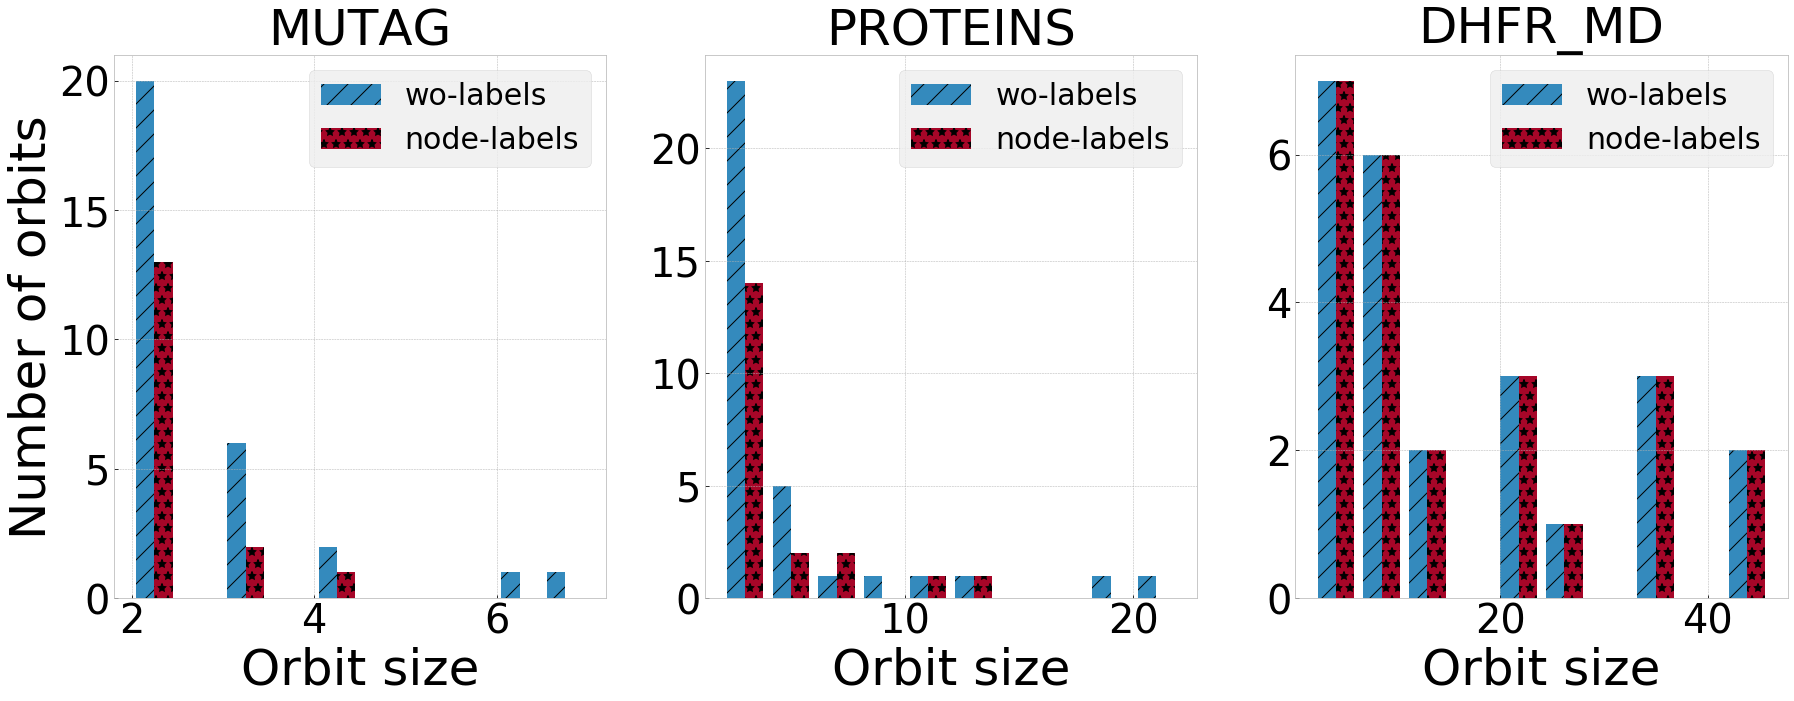

In [231]:
# dir1 = 'results_no_labels/'
# dir2 = 'results_node_labels/'
fns = list(filter(lambda x: x.endswith('.txt'), os.listdir(dir1 + 'orbits')))
N = len(fns)
N = 3
fig, axes = plt.subplots(nrows=N//3, ncols=3, figsize=(30, 10))


for i, dataset in enumerate(['MUTAG', 'PROTEINS', 'DHFR_MD']):
    orbits1 = get_orbits(dir1 + f'orbits/{dataset}_orbits.txt')
    try:
        orbits2 = get_orbits(dir2 + f'orbits/{dataset}_orbits.txt')
    except FileNotFoundError:
        orbits2 = None
    print(dataset)
#     ax = axes[i//3][i%3]
    ax = axes[i%3]
    ax.set_title(dataset)
    
    if orbits2 is not None:
        n, bins, patches = ax.hist([orbits1, orbits2], label=['wo-labels', 'node-labels'])
        hatches = ['/', '*'] # https://stackoverflow.com/a/40293705/2069858
        for patch_set, hatch in zip(patches, hatches):
            plt.setp(patch_set, hatch=hatch)
    else:
        ax.hist([orbits1], label=['no-labels'], rwidth=.4)
    ax.legend(loc='upper right')
    ax.set_xlabel("Orbit size")
    if i == 0:
        ax.set_ylabel("Number of orbits")
    ax.set_facecolor('w')
#     if i > 5:
#         break
plt.savefig('w_node_labels.pdf', bbox_inches='tight')
plt.show()

IMDB-BINARY
Letter-med
COLLAB


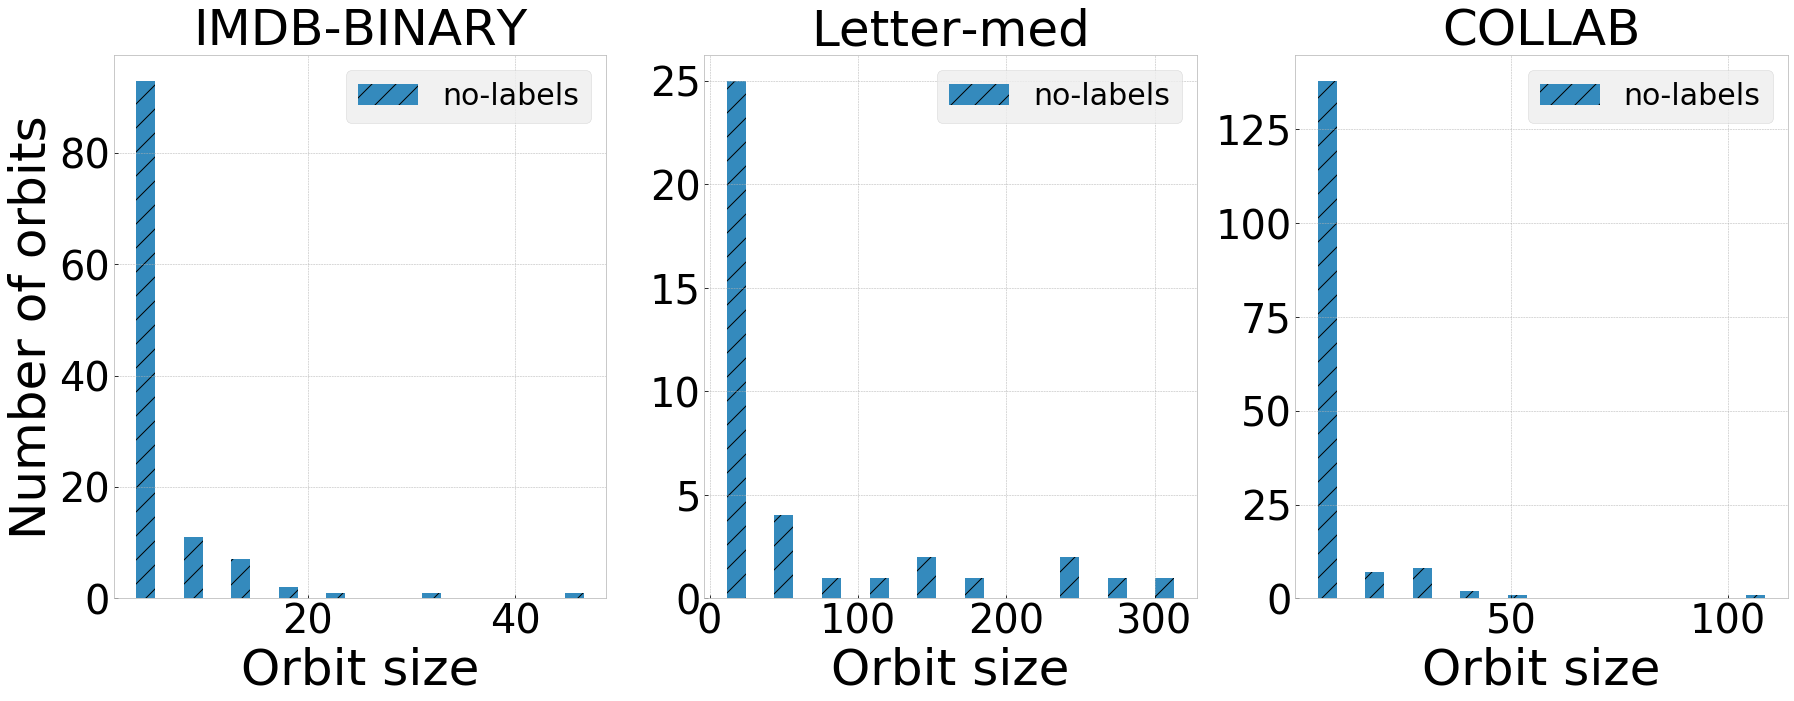

In [232]:
# dir1 = 'results_no_labels/'
# dir2 = 'results_node_labels/'
fns = list(filter(lambda x: x.endswith('.txt'), os.listdir(dir1 + 'orbits')))
N = len(fns)
N = 3
fig, axes = plt.subplots(nrows=N//3, ncols=3, figsize=(30, 10))

for i, dataset in enumerate(['IMDB-BINARY', 'Letter-med', 'COLLAB']):
    orbits1 = get_orbits(dir1 + f'orbits/{dataset}_orbits.txt')
    try:
        orbits2 = get_orbits(dir2 + f'orbits/{dataset}_orbits.txt')
    except FileNotFoundError:
        orbits2 = None
    print(dataset)
#     ax = axes[i//3][i%3]
    ax = axes[i%3]
    ax.set_title(dataset)
    
    if orbits2 is not None:
        n, bins, patches = ax.hist([orbits1, orbits2], label=['wo-labels', 'node-labels'])
        hatches = ['/', '*'] # https://stackoverflow.com/a/40293705/2069858
        for patch_set, hatch in zip(patches, hatches):
            plt.setp(patch_set, hatch=hatch)
    else:
        ax.hist([orbits1], label=['no-labels'], rwidth=.4, hatch='/')
    ax.legend(loc='upper right')
    ax.set_xlabel("Orbit size")
    if i == 0:
        ax.set_ylabel("Number of orbits")
    ax.set_facecolor('w')
#     if i > 5:
#         break
# plt.subplots_adjust(wspace = .41)
plt.savefig('wo_node_labels.pdf', bbox_inches='tight')
plt.show()

In [198]:
list(ax.get_xticklabels())

[Text(0.0, 0, '0'),
 Text(50.0, 0, '50'),
 Text(100.0, 0, '100'),
 Text(150.0, 0, '150')]

In [99]:
q = [
        'FIRSTMM_DB',
          'OHSU',
          'KKI',
          'Peking_1',
          'MUTAG',
          'MSRC_21C',
          'MSRC_9',
          'Cuneiform',
          'SYNTHETIC',
          'COX2_MD',
          'BZR_MD',
          'PTC_MM',
          'PTC_MR',
          'PTC_FM',
          'PTC_FR',
          'DHFR_MD',
          'Synthie',
          'BZR',
          'ER_MD',
          'COX2',
          'MSRC_21',
          'ENZYMES',
          'DHFR',
          'IMDB-BINARY',
          'PROTEINS',
          'DD',
          'IMDB-MULTI',
          'AIDS',
          'REDDIT-BINARY',
          'Letter-high',
          'Letter-low',
          'Letter-med',
          'Fingerprint',
          'COIL-DEL',
          'COIL-RAG',
          'NCI1',
          'NCI109',
          'FRANKENSTEIN',
          'Mutagenicity',
          'REDDIT-MULTI-5K',
          'COLLAB',
          'Tox21_ARE',
          'Tox21_aromatase',
          'Tox21_MMP',
          'Tox21_ER',
          'Tox21_HSE',
          'Tox21_AHR',
          'Tox21_PPAR-gamma',
          'Tox21_AR-LBD',
          'Tox21_p53',
          'Tox21_ER_LBD',
          'Tox21_ATAD5',
          'Tox21_AR',
          'REDDIT-MULTI-12K',
          'DBLP_v1'
    ]
len(q)

55

FIRSTMM_DB
OHSU
KKI
Peking_1
MUTAG
MSRC_21C
MSRC_9
Cuneiform
SYNTHETIC
COX2_MD
BZR_MD
PTC_MM
PTC_MR
PTC_FM
PTC_FR
DHFR_MD
Synthie
BZR


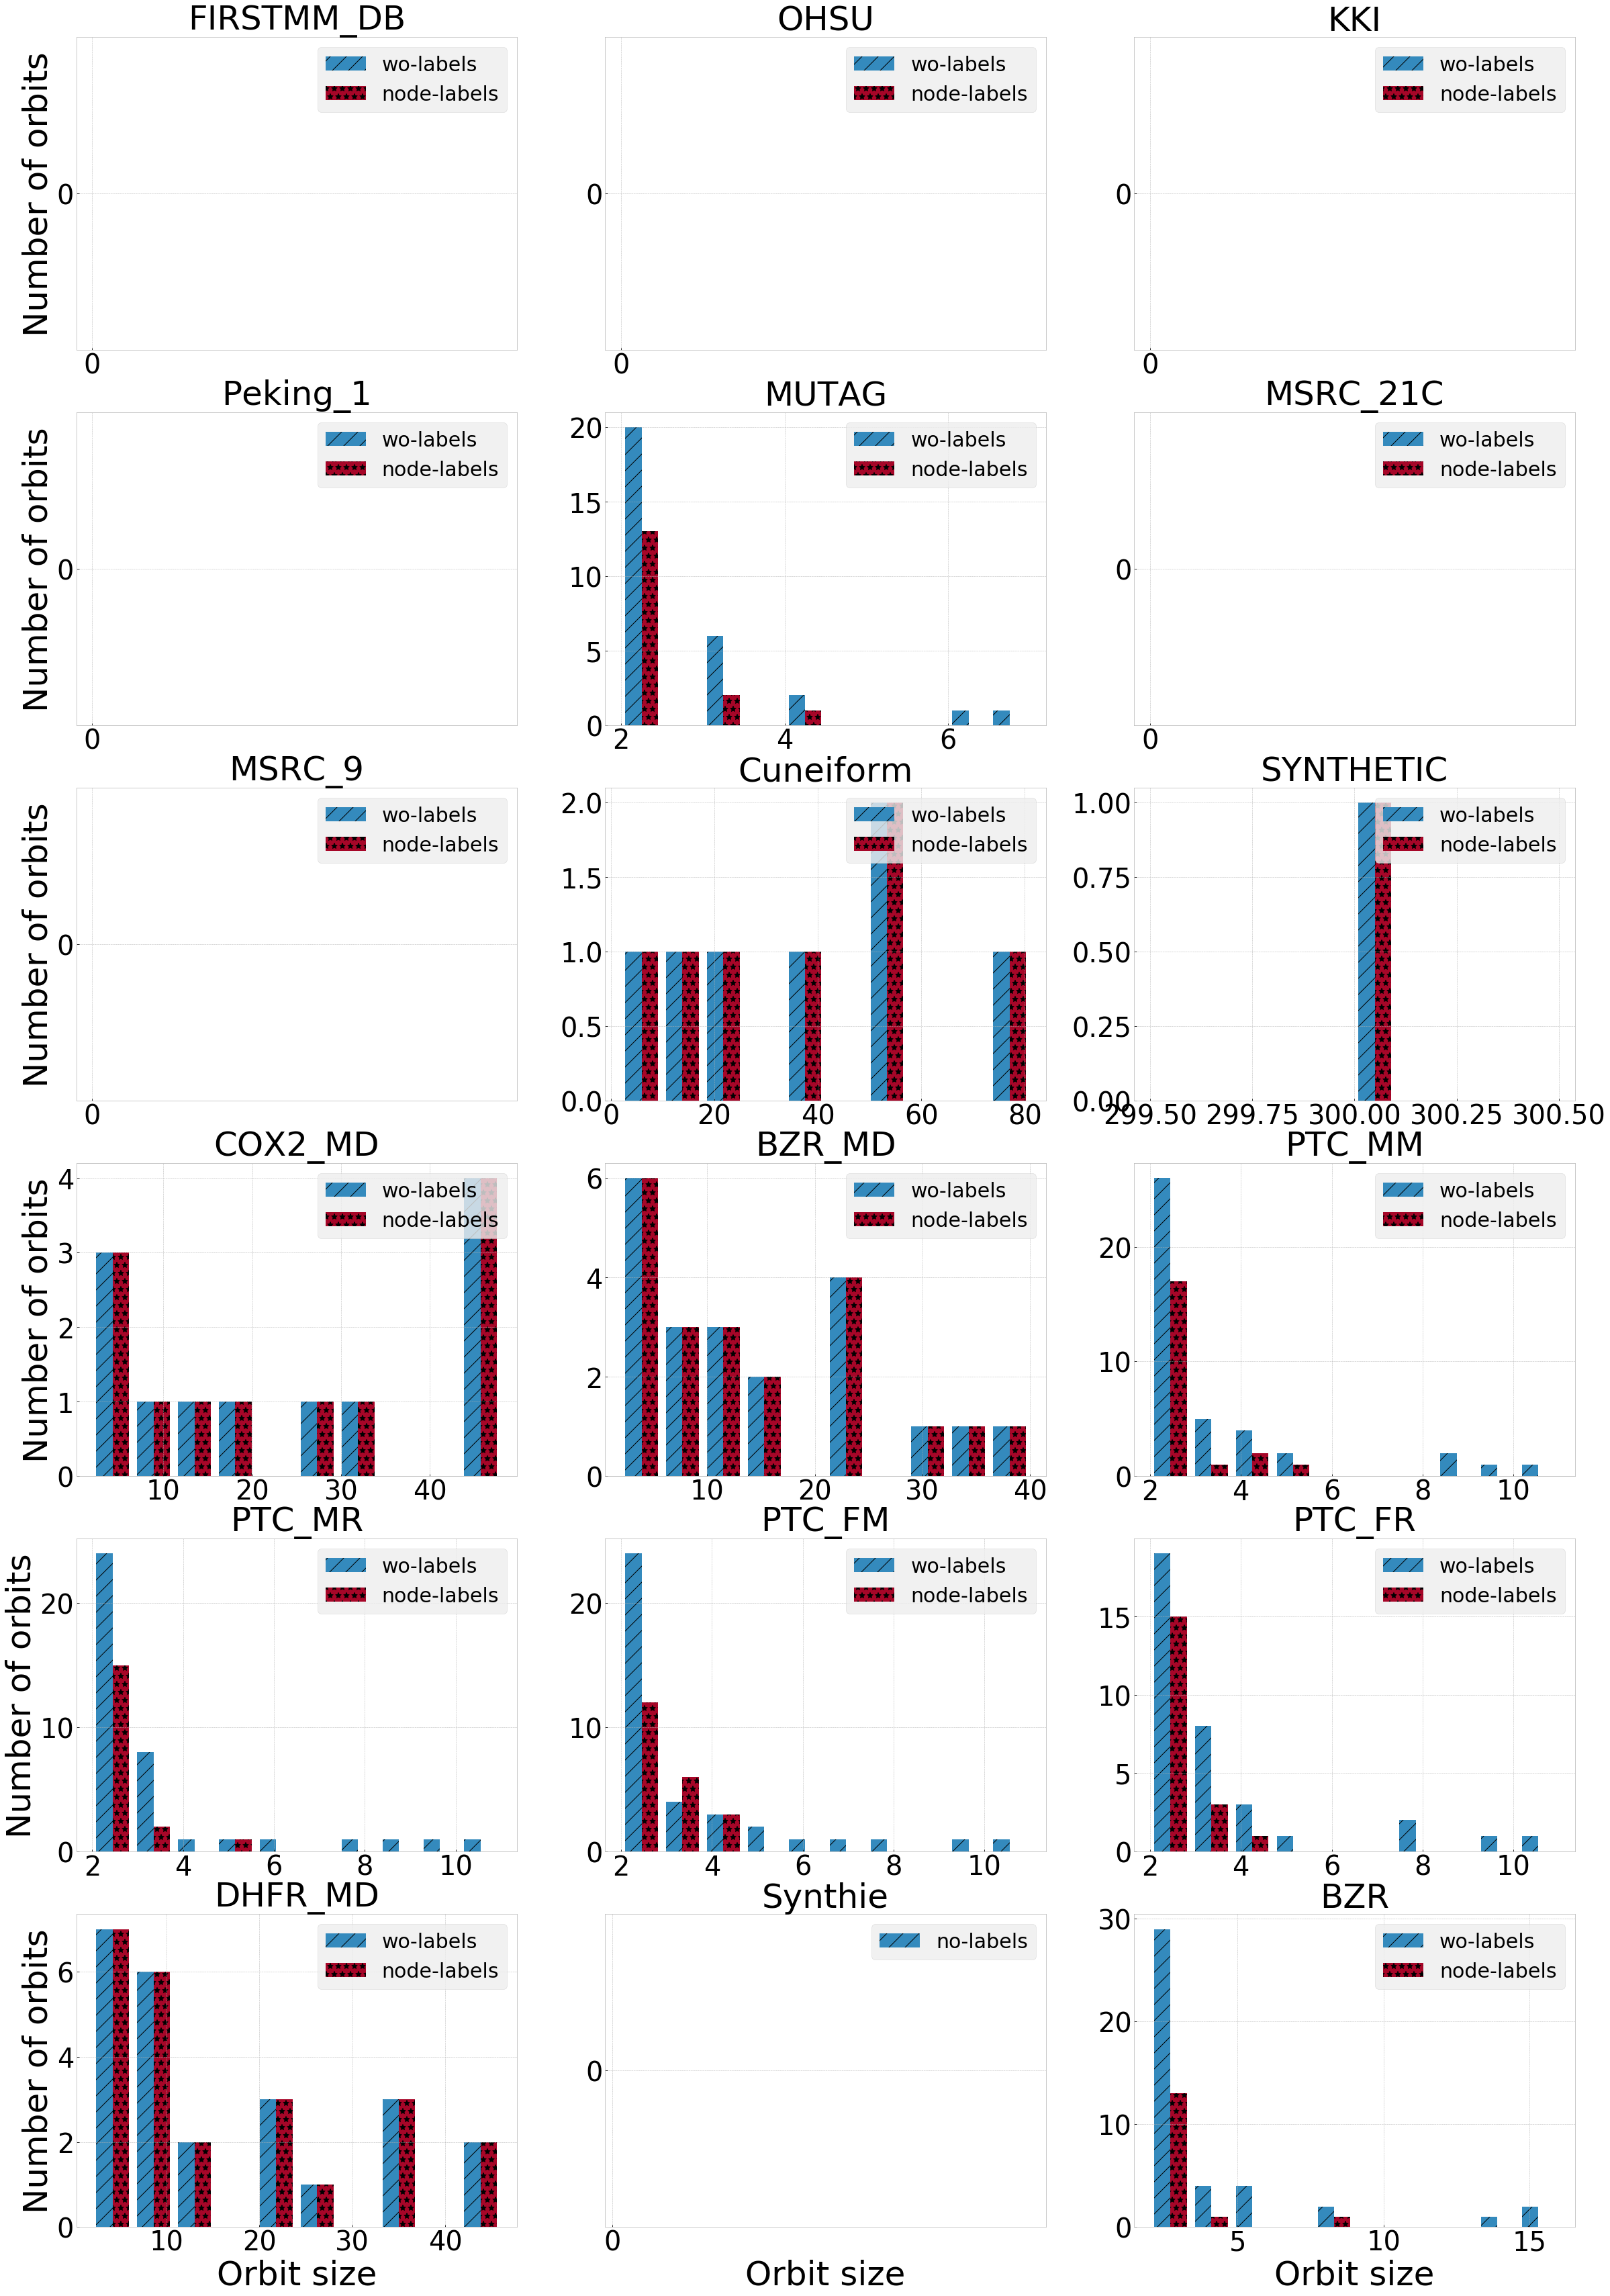

ER_MD
COX2
MSRC_21
ENZYMES
DHFR
IMDB-BINARY
PROTEINS
DD
IMDB-MULTI
AIDS
REDDIT-BINARY
Letter-high
Letter-low
Letter-med
Fingerprint
COIL-DEL
COIL-RAG
NCI1


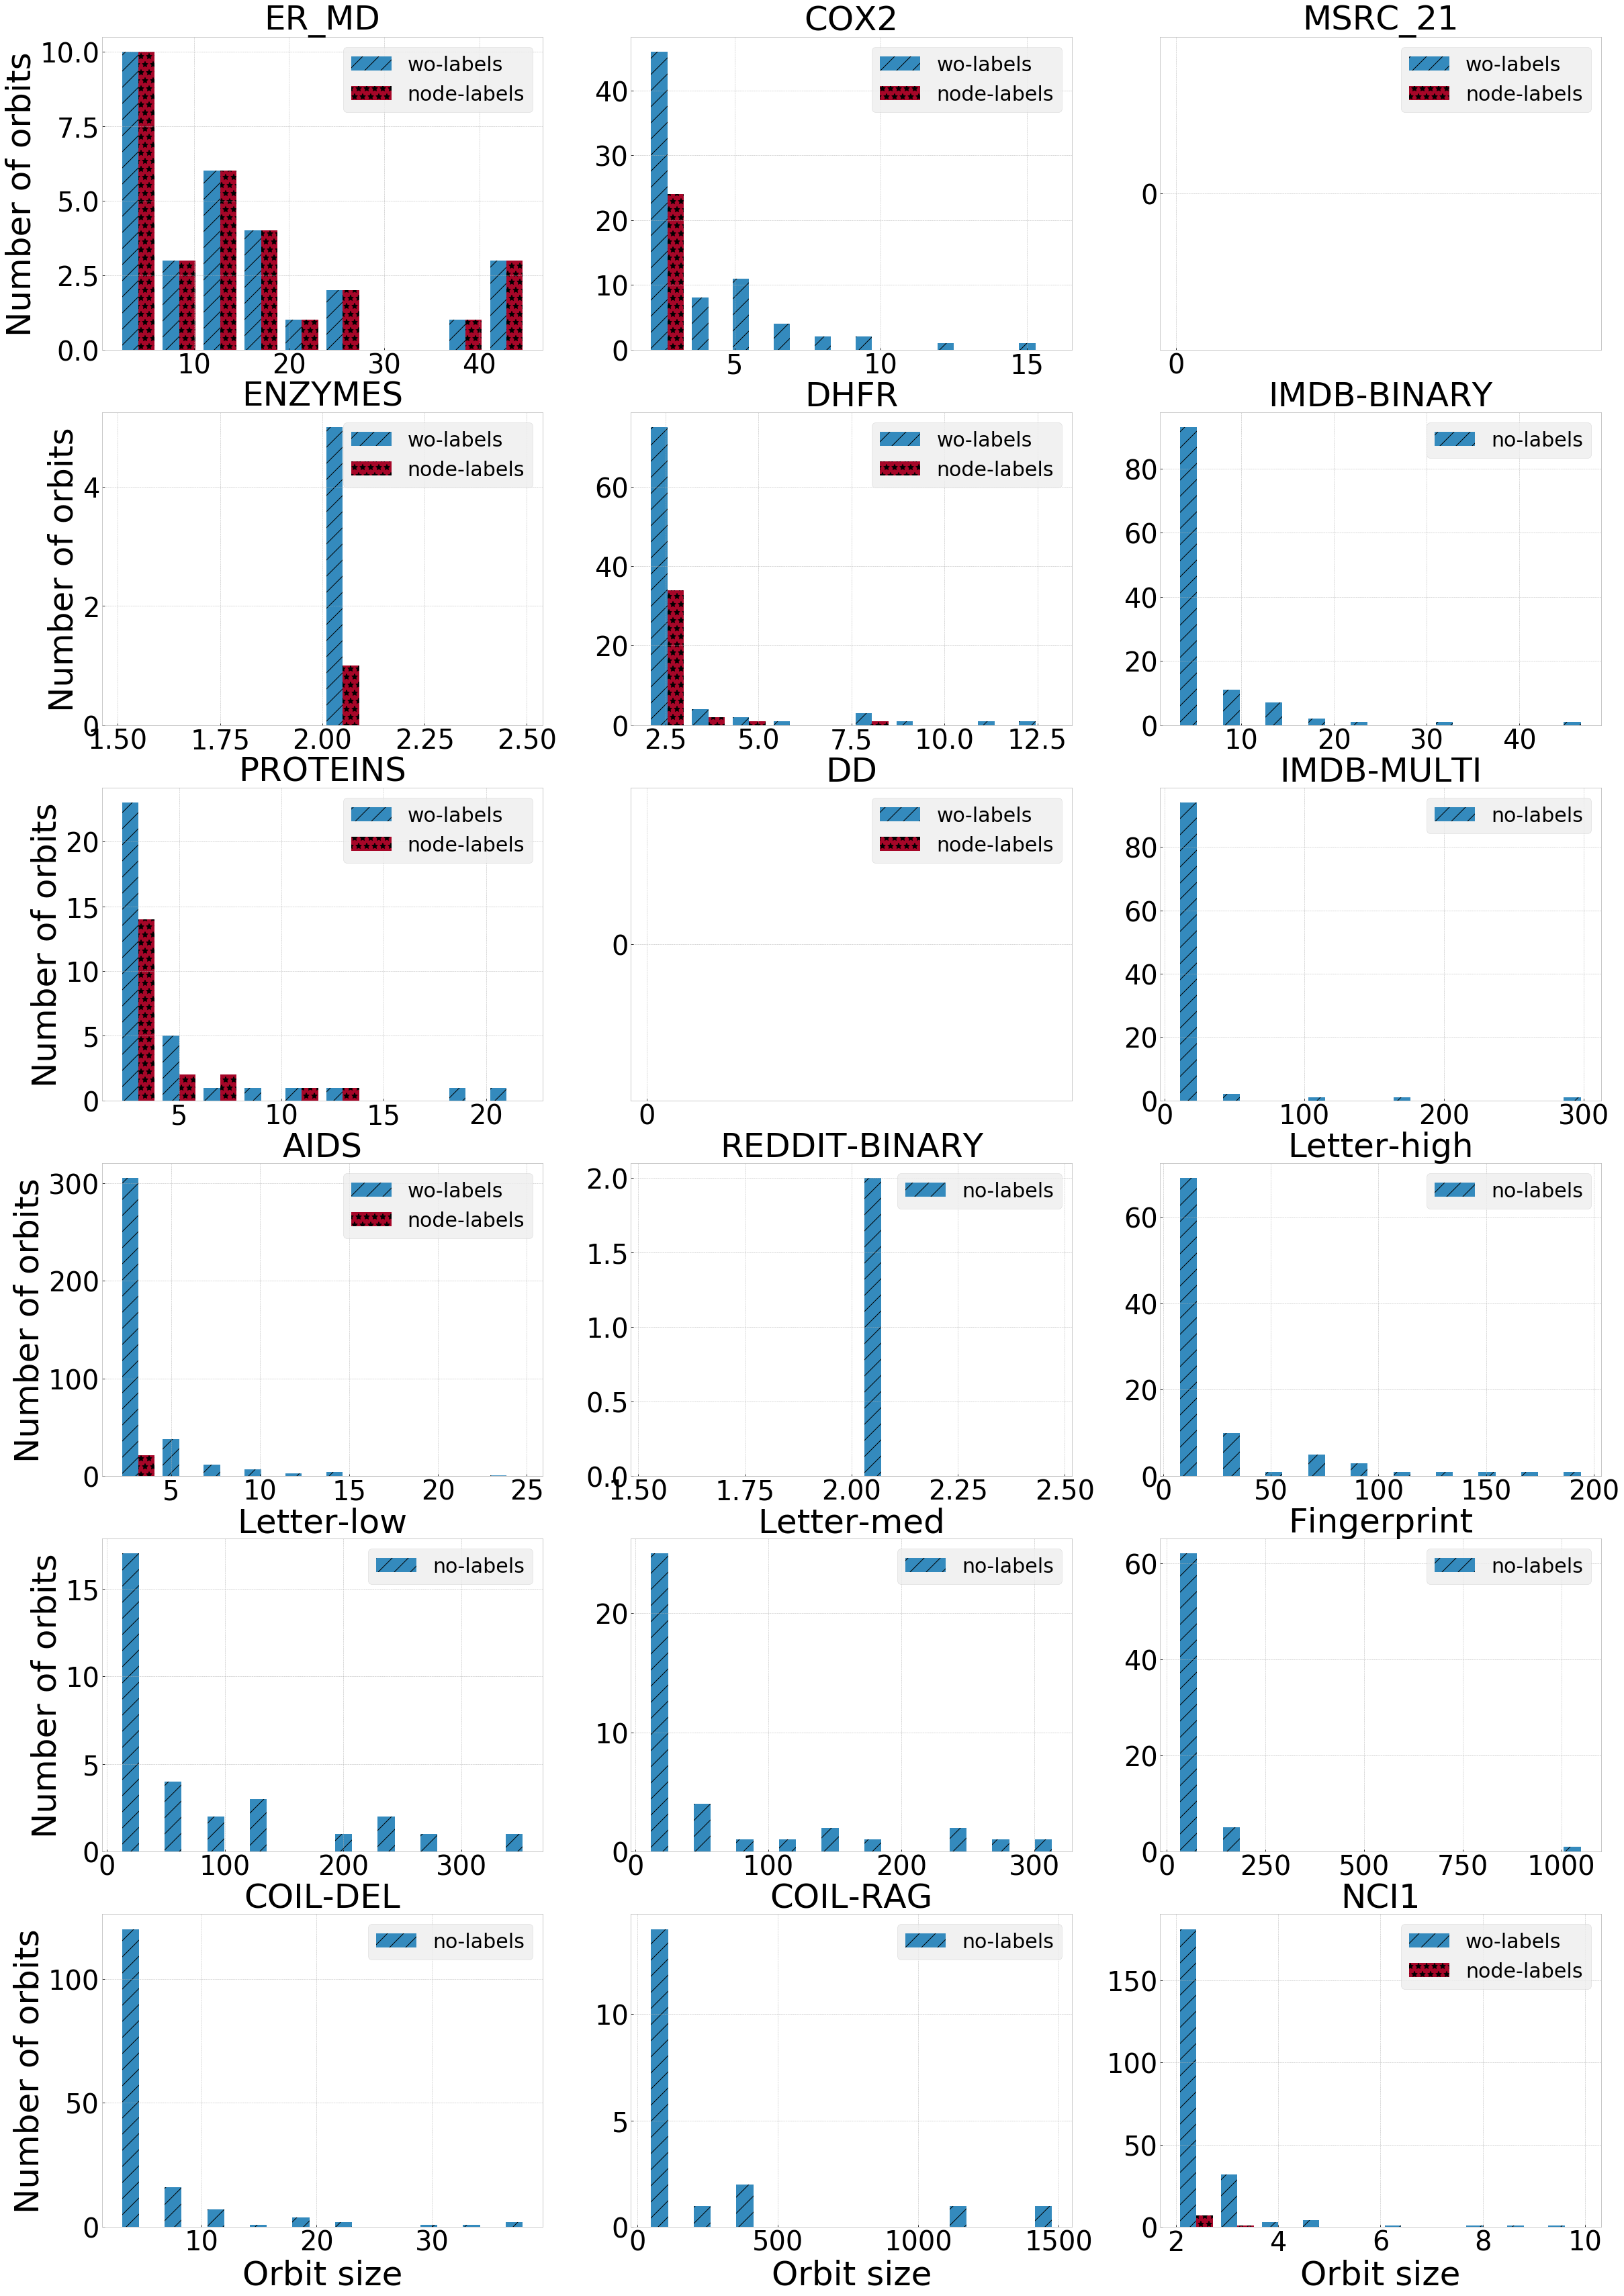

NCI109
FRANKENSTEIN
Mutagenicity
REDDIT-MULTI-5K
COLLAB
Tox21_ARE
Tox21_aromatase
Tox21_MMP
Tox21_ER
Tox21_HSE
Tox21_AHR
Tox21_PPAR-gamma
Tox21_AR-LBD
Tox21_p53
Tox21_ER_LBD
Tox21_ATAD5
Tox21_AR
REDDIT-MULTI-12K


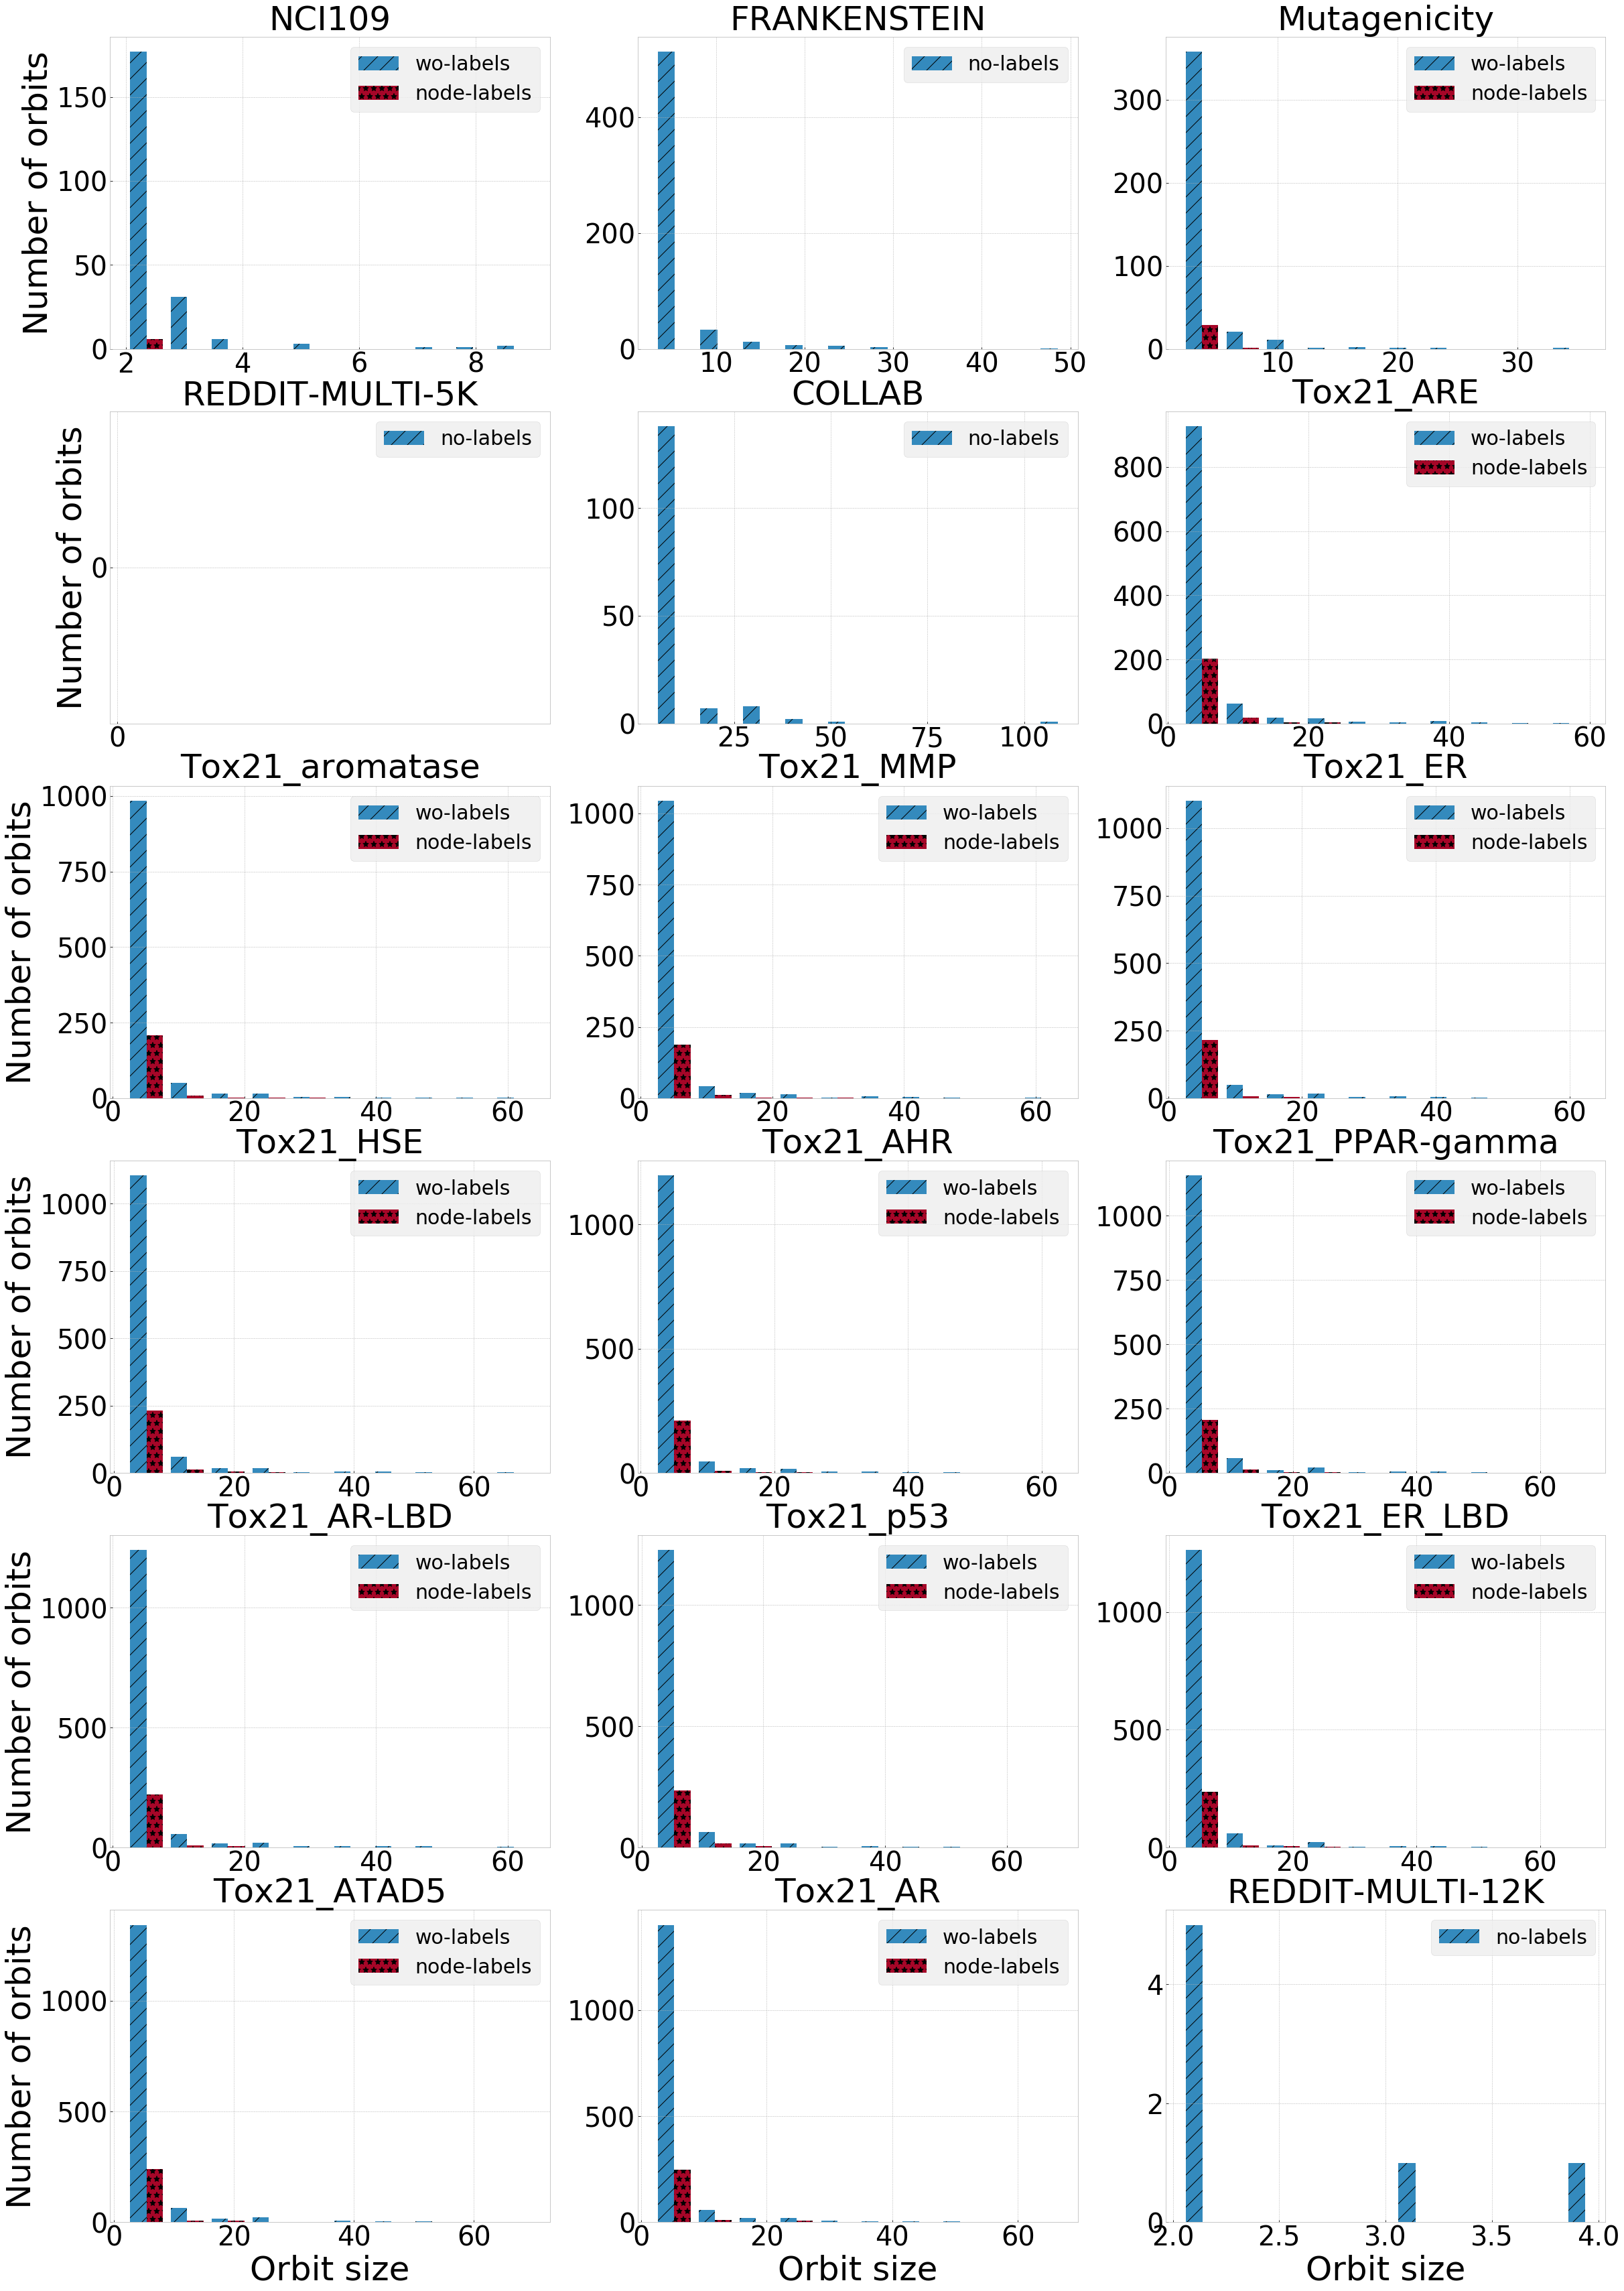

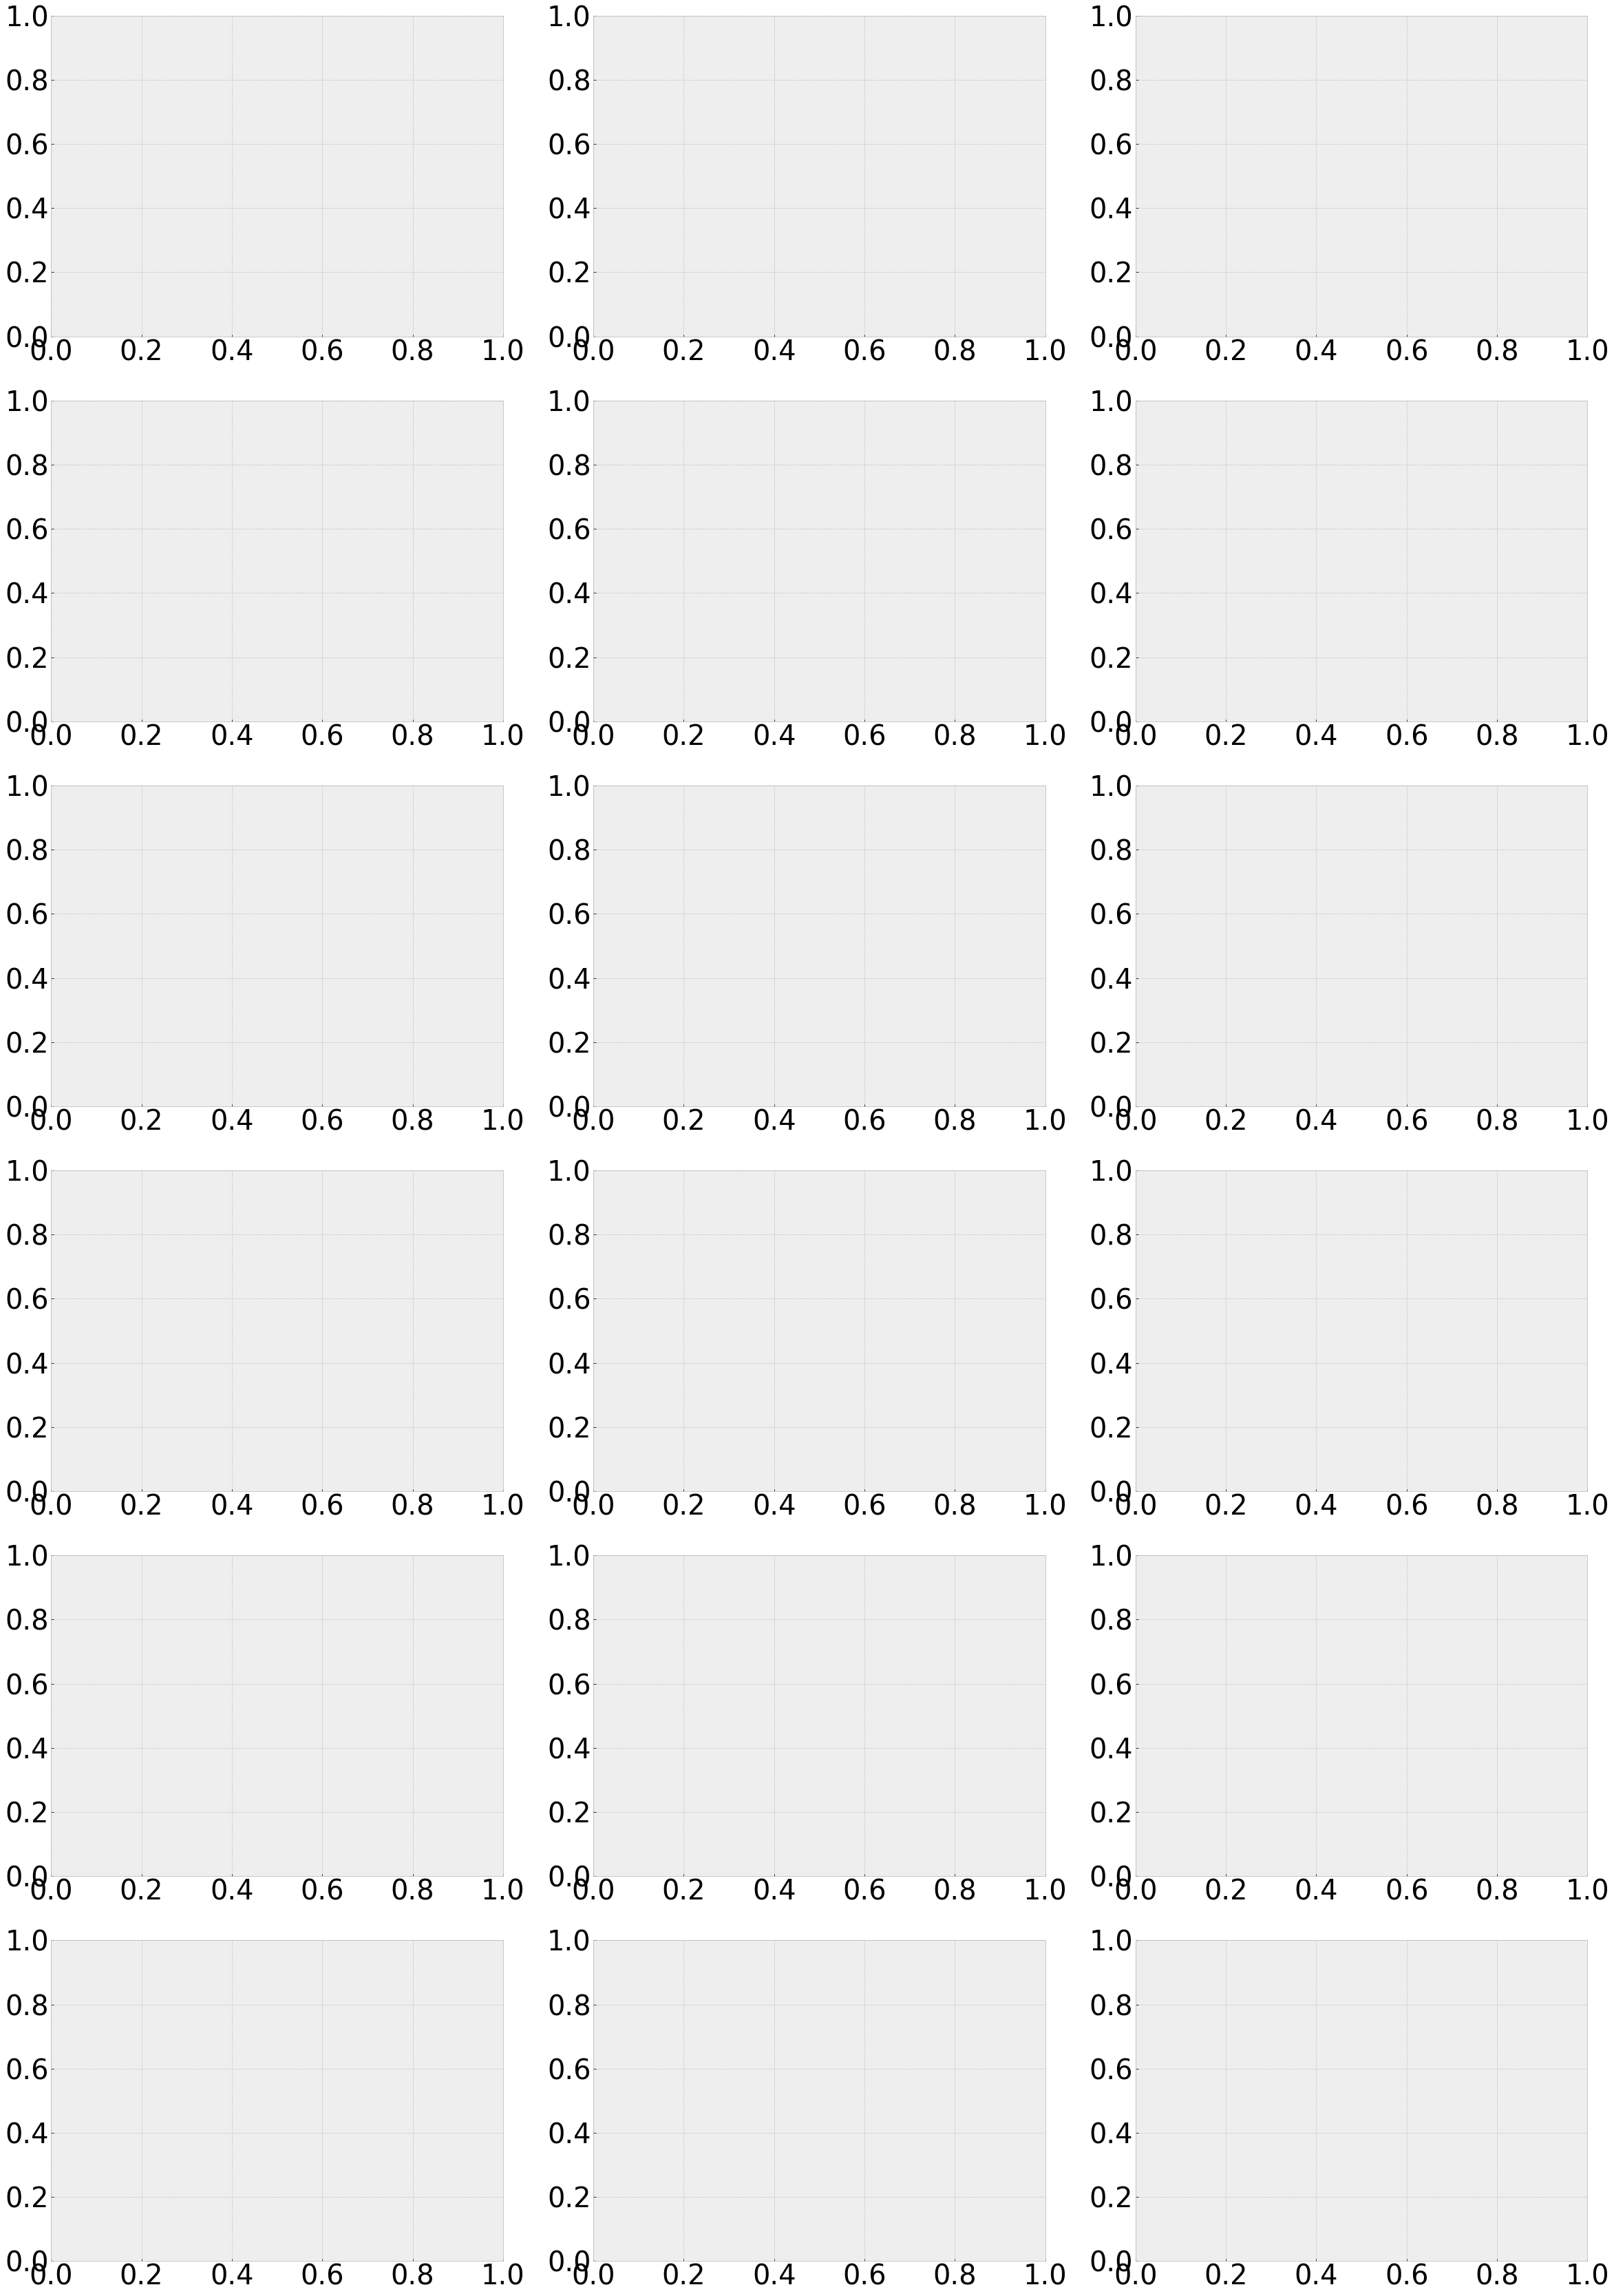

In [233]:
# dir1 = 'results_no_labels/'
# dir2 = 'results_node_labels/'
fns = list(filter(lambda x: x.endswith('.txt'), os.listdir(dir1 + 'orbits')))
N = len(fns)
# fig, axes = plt.subplots(nrows=N//3+1, ncols=3, figsize=(40, 100))
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(40, 60))

for i, dataset in enumerate(ds):
    orbits1 = get_orbits(dir1 + f'orbits/{dataset}_orbits.txt')
    try:
        orbits2 = get_orbits(dir2 + f'orbits/{dataset}_orbits.txt')
    except FileNotFoundError:
        orbits2 = None
    print(dataset)
    ax = axes[(i%18)//3][(i%18)%3]
    ax.set_title(dataset)
    
    if orbits2 is not None:
        n, bins, patches = ax.hist([orbits1, orbits2], label=['wo-labels', 'node-labels'])
        hatches = ['/', '*'] # https://stackoverflow.com/a/40293705/2069858
        for patch_set, hatch in zip(patches, hatches):
            plt.setp(patch_set, hatch=hatch)
    else:
        n, bins, patches = ax.hist([orbits1], label=['no-labels'], rwidth=.4, hatch='/')
        
    ax.legend(loc='upper right')
    if len(orbits1) == 0:
        ax.set_xticks([0])
        ax.set_yticks([0])
        
    if i%3 == 0:
        ax.set_ylabel("Number of orbits")
    if int((i%18)) in [15, 16, 17]:
        ax.set_xlabel("Orbit size")
        
    ax.set_facecolor('w')
    if (i+1)%18 == 0:
        plt.savefig('orbits-part{}.pdf'.format(i//18), bbox_inches='tight')
        plt.show()
        fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(40, 60))
#         break

In [77]:
G = nx.Graph()
with open('datasets/data_adj/MUTAG_adj/graph_1.adj') as f:
    line = next(f).split()
    n, m = int(line[0]), int(line[1])
    for line in f:
        splitted = line.split()
        G.add_edge(int(splitted[0]), int(splitted[1]))

In [80]:
node_labels = []
with open('datasets/MUTAG/MUTAG_node_labels.txt') as f:
    for line in f:
        node_labels.append(int(line))
        if len(node_labels) == len(G):
            break

In [85]:
edge_labels = []
with open('datasets/MUTAG/MUTAG_edge_labels.txt') as f:
    for line in f:
        edge_labels.append(int(line))
        if len(edge_labels) == 2*len(G.edges()):
            break

In [86]:
edge_labels

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 2,
 2,
 1,
 1]

In [102]:

ds = [
        'FIRSTMM_DB',
        'OHSU',
        'KKI',
        'Peking_1',
        'MUTAG',
        'MSRC_21C',
        'MSRC_9',
        'Cuneiform',
        'SYNTHETIC',
        'COX2_MD',
        'BZR_MD',
        'PTC_MM',
        'PTC_MR',
        'PTC_FM',
        'PTC_FR',
        'DHFR_MD',
        'Synthie',
        'BZR',
        'ER_MD',
        'COX2',
        'MSRC_21',
        'ENZYMES',
        'DHFR',
        'IMDB-BINARY',
        'PROTEINS',
        'DD',
        'IMDB-MULTI',
        'AIDS',
        'REDDIT-BINARY',
        'Letter-high',
        'Letter-low',
        'Letter-med',
        'Fingerprint',
        'COIL-DEL',
        'COIL-RAG',
        'NCI1',
        'NCI109',
        'FRANKENSTEIN',
        'Mutagenicity',
        'REDDIT-MULTI-5K',
        'COLLAB',
        'Tox21_ARE',
        'Tox21_aromatase',
        'Tox21_MMP',
        'Tox21_ER',
        'Tox21_HSE',
        'Tox21_AHR',
        'Tox21_PPAR-gamma',
        'Tox21_AR-LBD',
        'Tox21_p53',
        'Tox21_ER_LBD',
        'Tox21_ATAD5',
        'Tox21_AR',
        'REDDIT-MULTI-12K'
    ]